# AutoRegressive Integrated Moving Average
- https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
- https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
- 3 parameters, Autoregressive (p), integration / degree of differencing (d), moving average (q)
- seasonal has additional 3 parameters for the seasonal component, and the seasonal frequency
- https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html
- arima(1,0,0): y(t) = c + a*y(t-1) + err(t)
- arima(1,0,1): y(t) = c + a*y(t-1) + err(t) + b*err(t-1)
- arima(0,1,0): y(t) - y(t-1) = c + err(t), y(t-1) is also By(t)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fcns import *
from statsmodels.tsa.arima_model import ARIMA

In [2]:
lynx_df = pd.read_csv('datasets/lynx_data.csv', header=0, names=['year', 'trappings'], index_col=0)
lynx_df.head()

,trappings
year,
1821,269
1822,321
1823,585
1824,871
1825,1475


In [3]:
lynx_ts = pd.Series(lynx_df['trappings'].values, index=pd.date_range('1821', periods=114, freq='A-DEC'))
lynx_ts.head()

1821-12-31     269
1822-12-31     321
1823-12-31     585
1824-12-31     871
1825-12-31    1475
Freq: A-DEC, dtype: int64

- If the data is stationary (as this is), set d=0
- use pacf plot for parameter p, acf plots for parameter q (in general)

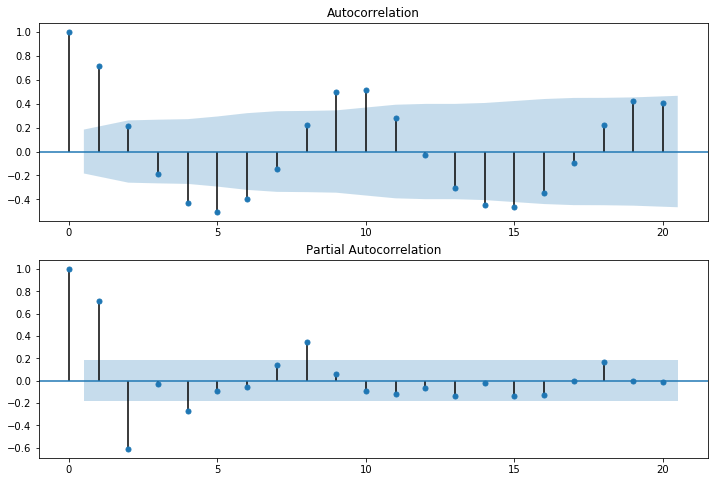

In [4]:
plot_autocorrelation(lynx_ts, 20)

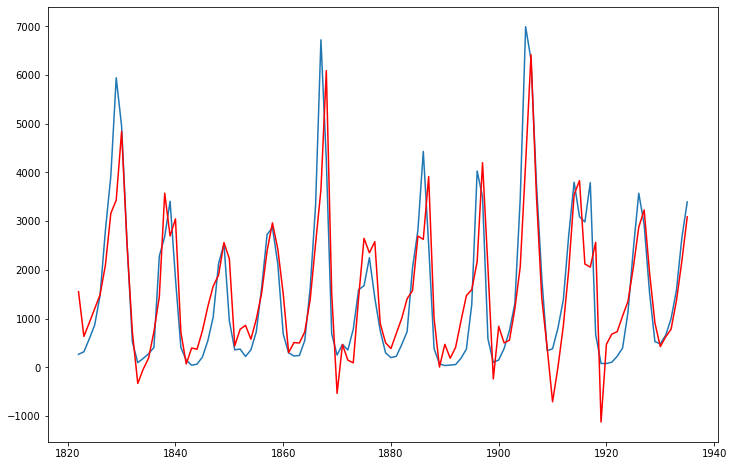

In [26]:
model = ARIMA(lynx_ts, order=(4,0,2))
res   = model.fit()
fig = plt.figure(figsize=(12,8))
plt.plot(lynx_ts)
plt.plot(res.fittedvalues, color='red')
plt.show()

In [27]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  114
Model:                     ARMA(4, 2)   Log Likelihood                -926.581
Method:                       css-mle   S.D. of innovations            811.024
Date:                Thu, 31 Oct 2019   AIC                           1869.162
Time:                        08:42:03   BIC                           1891.051
Sample:                    12-31-1821   HQIC                          1878.045
                         - 12-31-1934                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1553.6153    125.621     12.367      0.000    1307.403    1799.828
ar.L1.y        1.9972      0.169     11.808      0.000       1.666       2.329
ar.L2.y       -2.2827      0.234     -9.751      0.000      -2.742      -1.824
ar.L3.y        1.4099      0.190      7.412      0.000       1.037       1.783
ar.L4.y       -0.5681      0.102     -5.555      0.000      -0.768      -0.368
ma.L1.y       -0.9693      0.208     -4.660      0.000      -1.377      -0.562
ma.L2.y        0.6975      0.107      6.520      0.000       0.488       0.907
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8474           -0.6488j            1.0673           -0.1040
AR.2            0.8474           +0.6488j            1.0673            0.1040
AR.3            0.3935           -1.1792j            1.2432           -0.1987
AR.4            0.3935           +1.1792j            1.2432            0.1987
MA.1            0.6949           -0.9751j            1.1974           -0.1515
MA.2            0.6949           +0.9751j            1.1974            0.1515
-----------------------------------------------------------------------------
"""

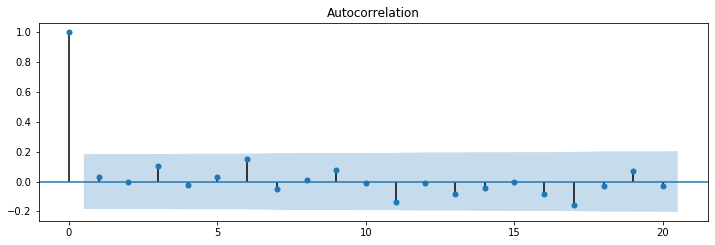

In [21]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(res.resid, lags=20, ax=ax1)

Shows the residuals are just random and not correlated (good)

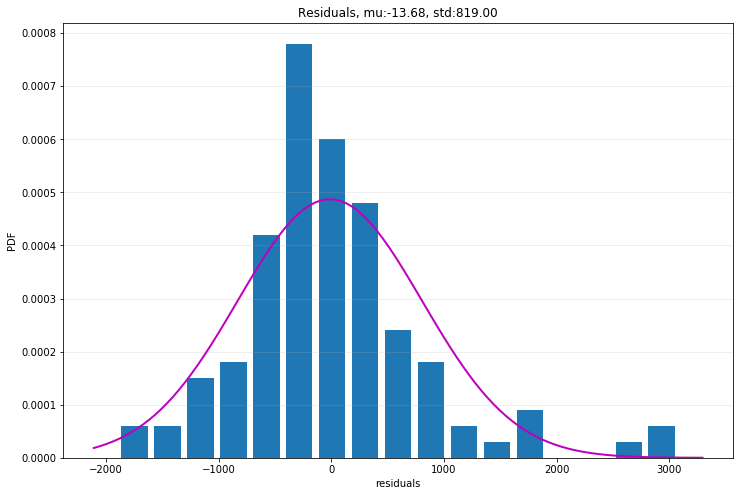

In [22]:
plot_norm(data=res.resid, label="residuals", title='Residuals', bins='auto', density=True, width=.8)

View ending observations for analysis

In [9]:
print(lynx_ts.tail())
print(res.fittedvalues.tail())
print(res.resid.tail())

1930-12-31     662
1931-12-31    1000
1932-12-31    1590
1933-12-31    2657
1934-12-31    3396
Freq: A-DEC, dtype: int64
1930-12-31     627.423205
1931-12-31     783.830759
1932-12-31    1373.294865
1933-12-31    2180.747483
1934-12-31    3089.685202
Freq: A-DEC, dtype: float64
1930-12-31     34.576795
1931-12-31    216.169241
1932-12-31    216.705135
1933-12-31    476.252517
1934-12-31    306.314798
Freq: A-DEC, dtype: float64


In [10]:
y  = 3396
y1 = 2657
y2 = 1590
c  = 699
l1 = 1.147
l2 = -.599
e  = 602

c + l1*(y1) + l2*(y2) +e

3396.1690000000003

In [11]:
4242.569-y

846.5690000000004

### Identifying parameters
- d: if number of significant lags in pacf is high, add a differencing step, if first lag is non significant then no further d. 0 ~ no trend, 1 ~ trending, 2 ~ varying trend
- p: positive significance at lag 1 or sharp cutoff between significant and non significant lags in pacf, add 1 
- if acf plot shows negative significance at lag 1 or sharp cutoff between significant and non signifiant lags add 1
- if summation of coefficients is close to 1, add 1 to d

### Seasonal parameters
- get acf and pacf plots for 3 cycles + a little extra, 
- set D to 1 if strong seasonal pattern is present
- add 1 to P if positive significant lag is present in all seasonal cycles
- add 1 to Q if negative significant lag is present in all seasonal cycles

### Forecasting

In [38]:
model2 = ARIMA(lynx_ts, order=(2,0,2))
res2   = model2.fit()

fore = res.forecast(steps=30)
pred = res.predict(start='1935', end='1945')

fore2 = res2.forecast(steps=30)
pred2 = res2.predict(start='1935', end='1945')

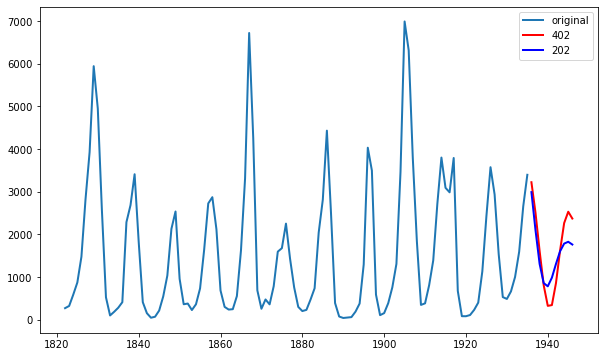

In [39]:
plt.figure(figsize=(10,6))
plt.plot(lynx_ts, linewidth=2, label='original')
plt.plot(pred, color='red', linewidth=2, label="402")
plt.plot(pred2, color='blue', linewidth=2, label="202")
plt.legend()
plt.show()

### Seasonality example
- seasonal decomposition derives trend, seasonality, and residuals
- requires initial amount of data, slow to catch fast rises, assumes seasonal component is constant
- improvements are SEATS, X-11, STL decomposition

In [51]:
temp_df = pd.read_csv("datasets/nottem.csv", header = 0, names=['month', 'temp'], parse_dates=[0], index_col=0)
temp_ts = pd.Series((temp_df['temp']).values, index=pd.date_range('1920', periods=240, freq='M'))
temp_ts.head()

1920-01-31    40.6
1920-02-29    40.8
1920-03-31    44.4
1920-04-30    46.7
1920-05-31    54.1
Freq: M, dtype: float64

Text(0.5, 1.0, 'temperature data')

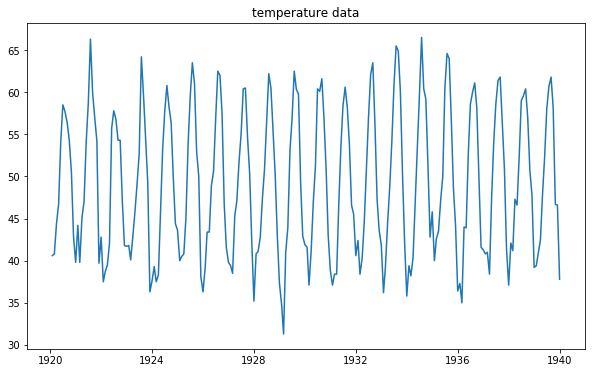

In [52]:
plt.figure(figsize=(10,6))
plt.plot(temp_ts)
plt.title("temperature data")

amplitude of seasons stays the same, no up or down trend, use additive model

### stldecompose library
- https://github.com/jrmontag/STLDecompose/blob/master/STL-usage-example.ipynb
- https://www.pydoc.io/pypi/stldecompose-mod-0.0.3/autoapi/stl/index.html

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [53]:
decomposed = seasonal_decompose(temp_ts, model='additive')

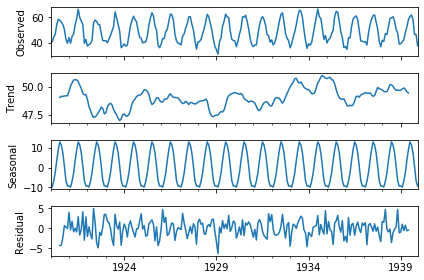

In [60]:
decplot = decomposed.plot()


In [69]:
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import naive, drift, mean, seasonal_naive

In [63]:
stl = decompose(temp_ts, period=12)
stl.trend.head()

1920-01-31    48.616042
1920-02-29    48.612980
1920-03-31    48.609917
1920-04-30    48.606960
1920-05-31    48.604002
Freq: M, dtype: float64

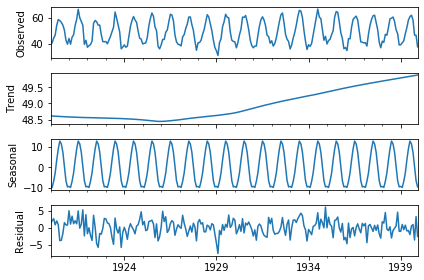

In [62]:
stlvis = stl.plot()

Text(0.5, 1.0, 'temp with seasonal component removed')

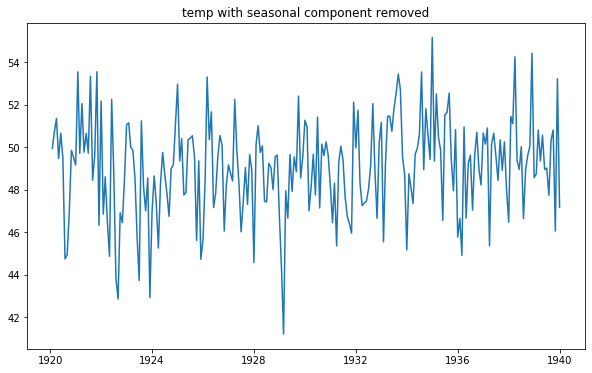

In [66]:
adjusted = temp_ts - decomposed.seasonal
plt.figure(figsize=(10,6))
plt.plot(adjusted)
plt.title("temp with seasonal component removed")

In [76]:
fcast = forecast(stl, steps=12, fc_func=seasonal_naive, seasonal=True)
fcast.head()

,seasonal_naive+seasonal
1940-01-31,40.508501
1940-03-02,40.006367
1940-04-02,43.014288
1940-05-03,47.111975
1940-06-03,53.384711


Text(0.5, 1.0, 'forecast using stldecompose')

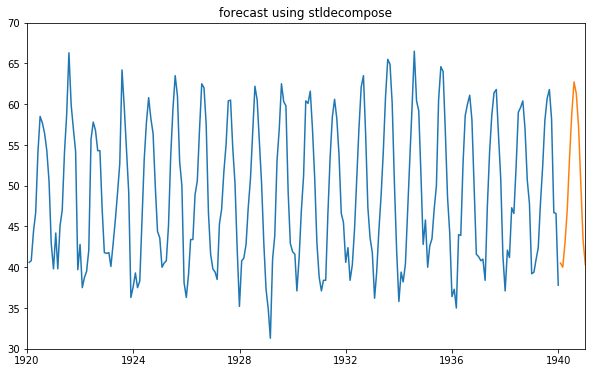

In [81]:
plt.figure(figsize=(10,6))
plt.plot(temp_ts, label='data')
plt.plot(fcast, label = fcast.columns[0])
plt.xlim('1920', '1941')
plt.ylim(30,70)
plt.title("forecast using stldecompose")